In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
estate_data = pd.read_csv("C:/Users/HP/Downloads/real_estate.csv")
estate_data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
numeric_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
estate_data[numeric_features + ['price_per_unit']].describe()

,house_age,transit_distance,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


C:\Users\HP\AppData\Local\Temp\ipykernel_7468\3358954726.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


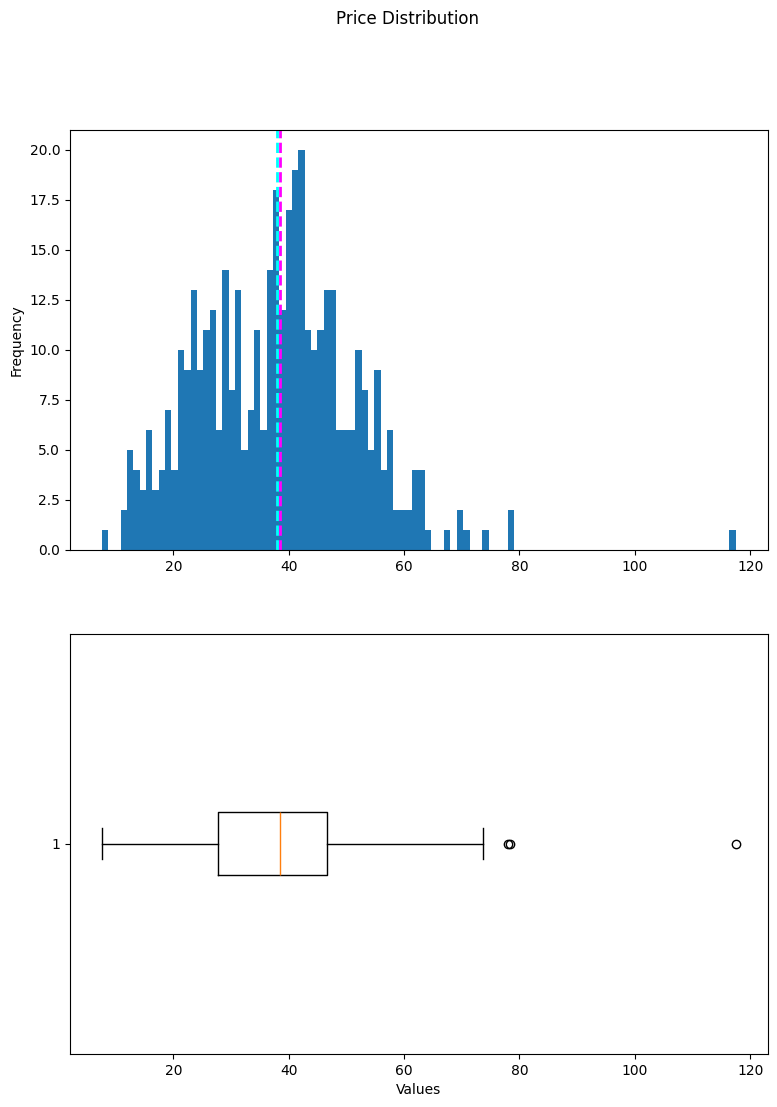

In [4]:
labels = estate_data['price_per_unit']
fig, ax  = plt.subplots(2,1, figsize=(9, 12))
ax[0].hist(labels, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=labels.mean(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=labels.median(), color='magenta', linestyle='dashed', linewidth=2)

ax[1].boxplot(labels, vert=False)
ax[1].set_xlabel('Values')
plt.suptitle('Price Distribution')
fig.show()

In [5]:
estate_data = estate_data[estate_data.price_per_unit < 70]

C:\Users\HP\AppData\Local\Temp\ipykernel_7468\3358954726.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


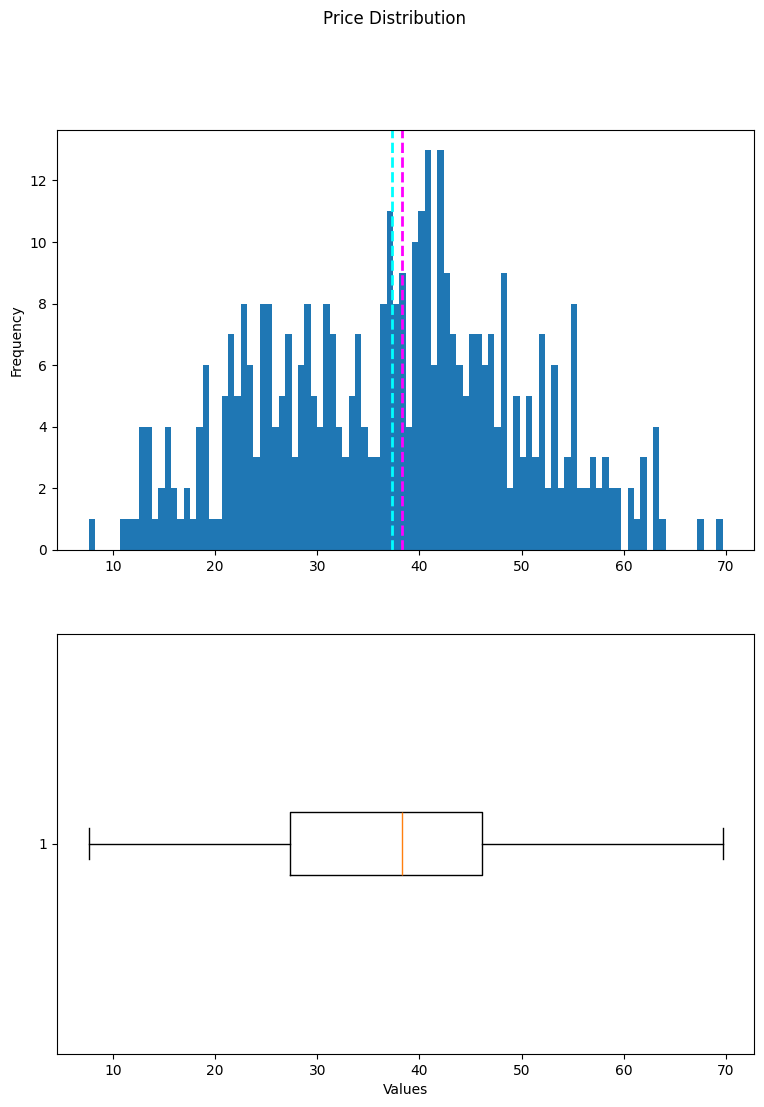

In [6]:
labels = estate_data['price_per_unit']
fig, ax  = plt.subplots(2,1, figsize=(9, 12))
ax[0].hist(labels, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=labels.mean(), color='cyan', linestyle='dashed', linewidth=2)
ax[0].axvline(x=labels.median(), color='magenta', linestyle='dashed', linewidth=2)

ax[1].boxplot(labels, vert=False)
ax[1].set_xlabel('Values')
plt.suptitle('Price Distribution')
fig.show()

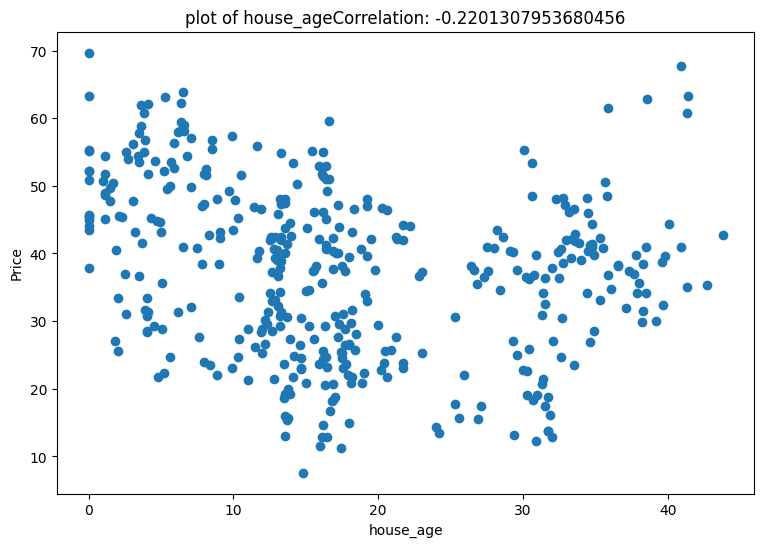

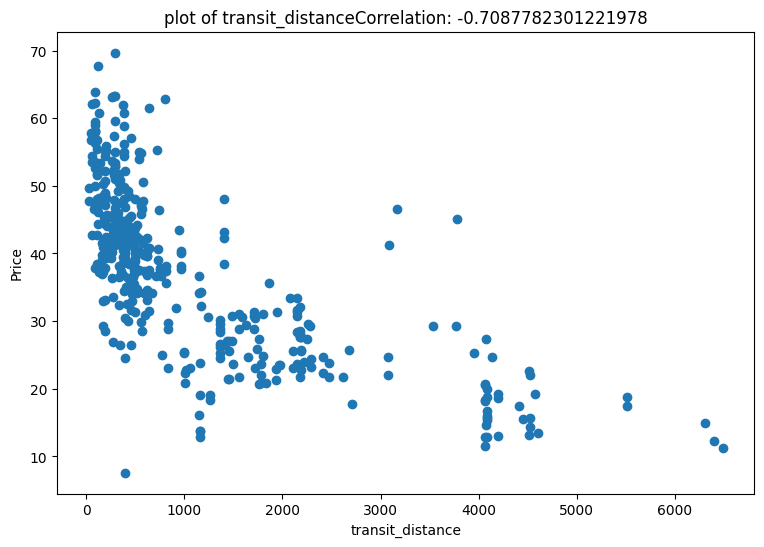

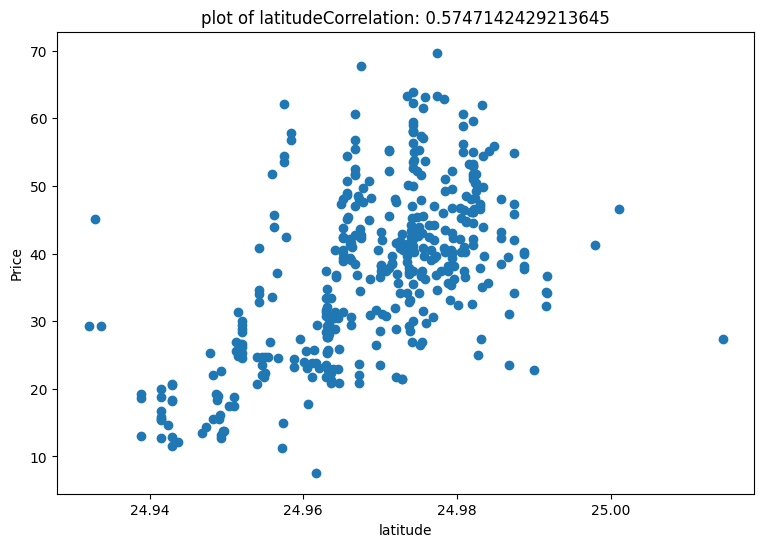

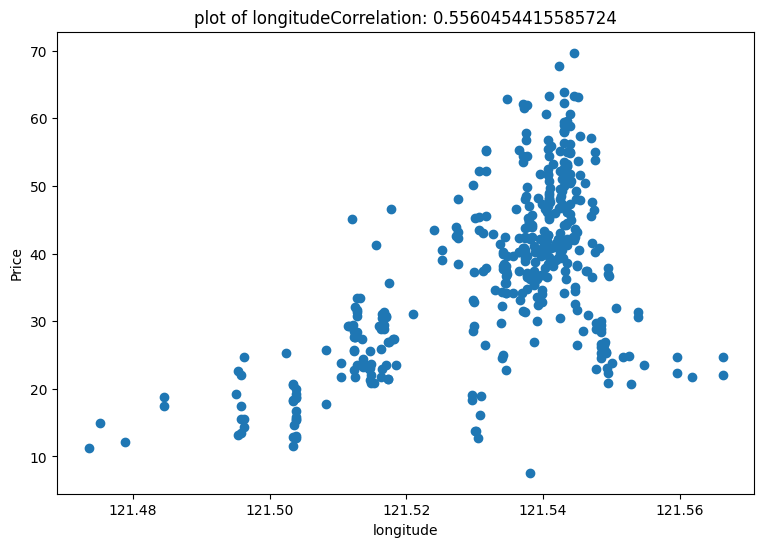

In [7]:
for col in numeric_features:
    features = estate_data[col]
    fig = plt.figure(figsize=(9, 6))
    correlation = features.corr(labels)
    ax = fig.gca()
    plt.scatter(x=features, y=labels)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('plot of ' + col + 'Correlation: ' + str(correlation))
    plt.show()

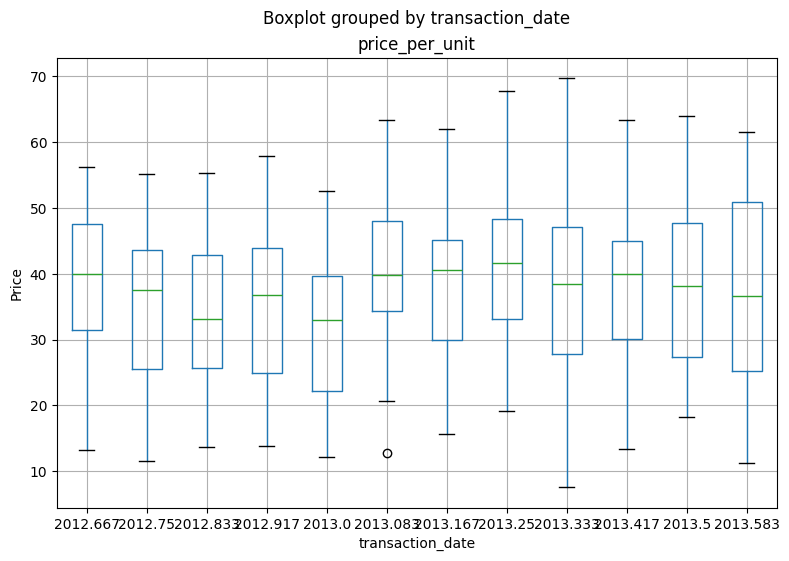

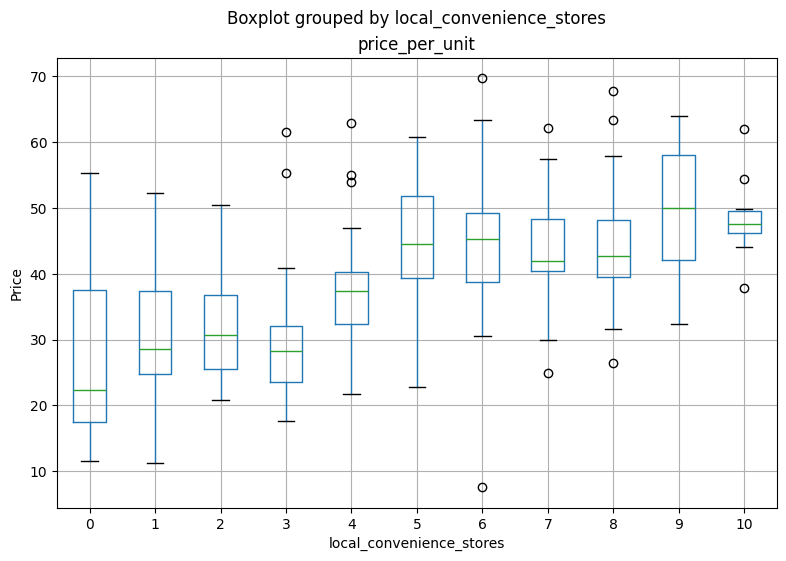

In [8]:
categorical_features = ['transaction_date', 'local_convenience_stores']
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    estate_data.boxplot(column='price_per_unit', by=col, ax = ax )
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [12]:
x,y = estate_data[['house_age', 'transit_distance', 'latitude', 'longitude', 'transaction_date', 'local_convenience_stores']].values, estate_data[['price_per_unit']].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

numeric_features = [0, 1, 2, 3]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])
model = pipeline.fit(x_train, (y_train))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model.predict(x_test)
mse = mean_squared_error(y_test, prediction)
print('mse: ', mse)
rmse = np.sqrt(mse)
print('rmse: ', rmse)
r2 = r2_score(y_test, prediction)
print('r2: ', r2)

mse:  38.3903670932313
rmse:  6.195996053358273
r2:  0.6724132635312887


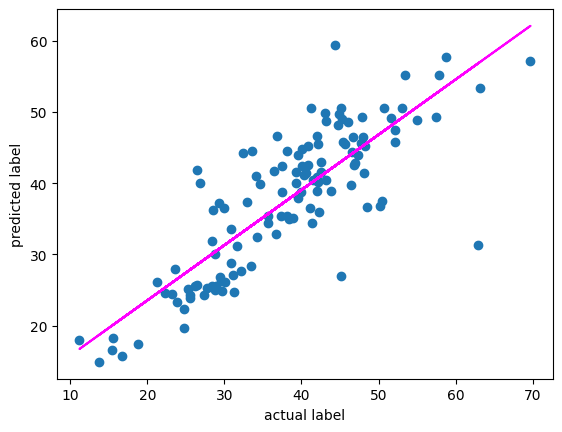

In [27]:
y_test = y_test.flatten()
plt.scatter(y_test, prediction)
plt.xlabel('actual label')
plt.ylabel('predicted label')

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [28]:
import joblib
filename = "C:/Users/HP/Downloads/real_estate..pkl"
joblib.dump(model, filename)

['C:/Users/HP/Downloads/real_estate..pkl']

In [30]:
loaded_model = joblib.load(filename)
x_new = np.array([[ 16.2, 289.3248, 24.98203, 121.54348, 2013.167, 5],
                  [ 13.6, 4082.015, 24.94155, 121.50381, 2013.000, 0]])
results = loaded_model.predict(x_new)
print('the predicted prices are:')
for prediction in results:
    print(np.round(prediction))

the predicted prices are:
49.0
17.0
